# IS 470 Assignment 1: Predicting Customer Churn Using Decision Trees

This assignment will help you understand how machine learning models, specifically decision
trees, are used to solve real-world business problems such as predicting customer churn. You’ll
explore a dataset, build classification models, and evaluate their performance. This foundational
project builds your skills for future assignments and gives you hands-on experience relevant to
careers in data science, analytics, and business intelligence.

In [73]:
# Mounting Google rive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from scipy.stats import pointbiserialr


In [75]:
# Read data
customer_churn = pd.read_csv('/content/drive/MyDrive/IS470_data/CutomerChurnData.csv')
customer_churn

cust_id region  tenure  age marital  address  income  ed  employ retire  \
0    C00124     R2      13   44       Y        9      64  E4       5      N   
1    C00125     R3      68   52       Y       24     116  E1      29      N   
2    C00126     R2      23   30       Y        9      30  E1       2      N   
3    C00127     R3      45   22       Y        2      19  E2       4      N   
4    C00128     R3      45   59       Y        7     166  E4      31      N   
..      ...    ...     ...  ...     ...      ...     ...  ..     ...    ...   
995  C01119     R1      50   43       N        6      27  E3       4      N   
996  C01120     R1      34   52       Y        2     106  E2      19      N   
997  C01121     R1      15   46       Y       17      63  E5       1      N   
998  C01122     R1       7   34       N        2      22  E5       5      N   
999  C01123     R3      70   49       N       18      87  E2      22      N   

     ... internet  callid callwait forward confer ebill  loglong  lninc  \
0    ...        N       N        N       Y      N     N    1.308  4.159   
1    ...        N       Y        Y       N      Y     N    2.899  4.754   
2    ...        N       Y        N       Y      Y     N    1.841  3.401   
3    ...        Y       N        Y       N      N     Y    2.389  2.944   
4    ...        N       Y        Y       Y      Y     N    2.277  5.112   
..   ...      ...     ...      ...     ...    ...   ...      ...    ...   
995  ...        N       Y        Y       Y      Y     N    2.708  3.296   
996  ...        Y       Y        N       Y      Y     N    1.599  4.663   
997  ...        Y       Y        N       Y      Y     Y    1.308  4.143   
998  ...        N       N        N       N      N     N    1.537  3.091   
999  ...        N       Y        Y       Y      Y     N    3.243  4.466   

     custcat  churn  
0         C1      Y  
1         C3      N  
2         C3      N  
3         C2      Y  
4         C3      N  
..       ...    ...  
995       C3      N  
996       C3      N  
997       C4      Y  
998       C1      N  
999       C3      N  

[1000 rows x 39 columns]

## Business Understanding:<br/>
**Customer Churn:** This is a number which represents the percentage of customers who stop using your product or service over a given time.<br/>
**Customer Churn in the Telecommunications Industry:** This would be what percentage of customers stop using your service during any given time<br/><br/>
For the purpose of analysis, we can form this into a binary classification problem by defining two unique states:

*   Churned Customers
*   Retained Customers


In [76]:
customer_churn.keys()

Index(['cust_id', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn'],
      dtype='object')

## Data Understanding
### Definitions
**cust_id:** This is just a unique identifier<br/>
**region:** Area of the country<br/>
**tenure:** The amount of months that a customer has been a customer<br/>
**age:** The age of the customer in years<br/>
**marital:** This appears to be the marital status? Y or N<br/>
**address:** Number of years at current address<br/>
**income:** Annual Income (in thousands of dollars)<br/>
**ed:** Educational level<br/>
**employ:** Number of years employed<br/>
**retire:** Retirement Status<br/>
**gender:** Gender<br/>
**reside:** Number of people in household<br/>
**tollfree:** Whether customer has toll-free service<br/>
**equip:** Whether customer has equipment protection<br/>
**callcard:** Uses calling card service<br/>
**wireless:** Has wireless service<br/>
**longmon:** Long-distance minutes used in last month<br/>
**tollmon:** Toll-free minutes used in last month<br/>
**equipmon:** Equipment charges this month<br/>
**cardmon:** Calling card charges this month<br/>
**wiremon:** Wireless charges this month<br/>
**longten:** Cumulative long-distance usage over tenure<br/>
**tollten:** Cumulative toll-free usage over tenure<br/>
**equipten:** Cumulative equipment charges over tenure<br/>
**cardten:** Cumulative calling card charges over tenure<br/>
**wireten:** Cumulative wireless charges over tenure<br/>
**multline:** Has multiple phone lines<br/>
**voice:** Has voice mail service<br/>
**pager:** Has pager service<br/>
**internet:** Has internet service<br/>
**callid:** Has caller ID<br/>
**callwait:** Has call waiting<br/>
**forward:** Has call forwarding<br/>
**confer:** Has conference calling feature<br/>
**ebill:** Uses electronic billing<br/>
**loglong:** Log-transformed long distance usage<br/>
**lninc:** Log-transformed Income<br/>
**custcat:** Customer cateogory<br/>
**churn:** Whether customer churned



In order to determine how each variable relates to the problem at hand (which is whether or not a customer churned). I am creating the following set of functions.<br/>

*   preprocess_churn_data : This function is needed because the data is not in an operational state. For example things like money might be represented as $4.99 and the system doesn't know how to handle that. so this function cleans that up
*   analyse_churn_correlations : this function is what actually does the analysis. depending on whether the field is numeric or categorical it uses one or another function to determine the correlation with teh control variable (churn) it then outputs the results in order.
<br/>Note, both of these functions where originally created by ChatGPT, however I have studied them and understand what they do.



In [77]:
def preprocess_churn_data(df):
    df_clean = df.copy()

    # Step 1: Convert churn column to binary
    if 'churn' in df_clean.columns:
        df_clean['churn'] = df_clean['churn'].map({'Y': 1, 'N': 0})

    # Step 2: Convert all 'Y'/'N' columns to 1/0
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object' and set(df_clean[col].dropna().unique()) <= {'Y', 'N'}:
            df_clean[col] = df_clean[col].map({'Y': 1, 'N': 0})

    # Step 3: Try converting object columns to numeric where possible
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            # Remove symbols and try to convert
            df_clean[col] = df_clean[col].str.replace(r'[\$,K]', '', regex=True)
            try:
                df_clean[col] = pd.to_numeric(df_clean[col])
            except:
                pass  # Leave as is if it can't be converted

    return df_clean


In [78]:
def analyze_churn_correlations(df, target_col='churn', exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in the DataFrame.")

    # Prepare variables
    X = df.drop(columns=[target_col] + exclude_cols)
    y = df[target_col]

    results = []

    for col in X.columns:
        try:
            # Skip all-null columns
            if X[col].isnull().all():
                continue

            # If it's numeric and can be converted
            if pd.api.types.is_numeric_dtype(X[col]):
                corr, p_val = pointbiserialr(X[col].fillna(0), y)
                results.append({
                    'feature': col,
                    'type': 'numeric',
                    'metric': 'point_biserial_corr',
                    'score': abs(corr),
                    'p_value': p_val
                })
            else:
                # Convert to categorical explicitly
                mi = mutual_info_classif(X[[col]].fillna('NA').astype(str), y, discrete_features=True)
                results.append({
                    'feature': col,
                    'type': 'categorical',
                    'metric': 'mutual_info',
                    'score': mi[0],
                    'p_value': None
                })

        except Exception as e:
            print(f"Skipping column {col}: {e}")

    results_df = pd.DataFrame(results)

    if not results_df.empty and 'score' in results_df.columns:
        return results_df.sort_values(by='score', ascending=False).reset_index(drop=True)
    else:
        raise ValueError("No valid features found. Please check your data types and column names.")


Now we actually use this function to determine the relationships

In [79]:

# Step 1: Preprocess your data
df_clean = preprocess_churn_data(customer_churn)

# Step 2: Run correlation analysis
exclude_cols = ['cust_id']  # Add any other irrelevant ID columns
result = analyze_churn_correlations(df_clean, target_col='churn', exclude_cols=exclude_cols)

# Step 3: View the results
print(result)




Skipping column region: could not convert string to float: 'R2'
Skipping column ed: could not convert string to float: 'E4'
Skipping column custcat: could not convert string to float: 'C1'
     feature     type               metric     score       p_value
0     tenure  numeric  point_biserial_corr  0.373287  2.031174e-34
1    loglong  numeric  point_biserial_corr  0.323931  7.319137e-26
2   internet  numeric  point_biserial_corr  0.310136  9.784239e-24
3      equip  numeric  point_biserial_corr  0.267653  7.246184e-18
4     employ  numeric  point_biserial_corr  0.263677  2.285789e-17
5    longten  numeric  point_biserial_corr  0.256774  1.604942e-16
6    longmon  numeric  point_biserial_corr  0.251933  6.083048e-16
7   callcard  numeric  point_biserial_corr  0.241241  1.044913e-14
8    cardten  numeric  point_biserial_corr  0.234727  5.531369e-14
9        age  numeric  point_biserial_corr  0.229835  1.871681e-13
10     ebill  numeric  point_biserial_corr  0.229782  1.896224e-13
11  equ

Note, the above list is in order of importance, with the score value being how close the variable tracks with the churn parameter.  This is how we are doing the following charts and graphs

Note, for some reason the fields: region, ed, and custcat were all not processible so I would like to take a quick look at those first to see if there is anything we can learn about them

In [80]:
customer_churn[['region','ed','custcat']].describe()

region    ed custcat
count    1000  1000    1000
unique      3     5       4
top        R3    E2      C3
freq      346   290     290

Nothing in particular odd, lets take a closer look

In [81]:
customer_churn['region'].value_counts()

region
R3    346
R2    338
R1    316
Name: count, dtype: int64

In [82]:
customer_churn['ed'].value_counts()

ed
E2    290
E3    220
E1    218
E4    216
E5     56
Name: count, dtype: int64

In [83]:
customer_churn['custcat'].value_counts()

custcat
C3    290
C1    254
C4    240
C2    216
Name: count, dtype: int64

Again, not seeing anything in particular odd here, although I do wonder what exactly custcat is for? (my guess is this is a numeric index referencing some other data set).  Next we will start looking at some of the more important values (according to the results of our previous algorithmic inspection of the values)

In [84]:
# Lets get some summary stats for the most important variables
customer_churn[['tenure', 'loglong']].describe()

tenure      loglong
count  1000.000000  1000.000000
mean     35.242000     2.149468
std      21.295937     0.716255
min       1.000000     0.049000
25%      16.000000     1.639000
50%      34.500000     2.140000
75%      53.000000     2.629000
max      72.000000     4.605000

Yea, i'm not really sure what this shows us other than the basic shape of the data, that being tenure has a mean around 35, and laglong 2.14. Lets try another...

Text(0.5, 1.0, 'Boxplot age')

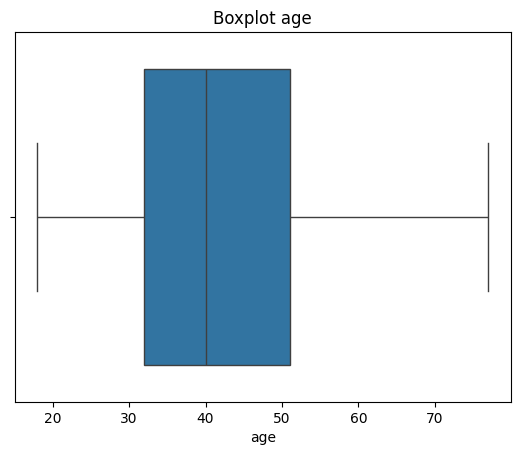

In [85]:
# Boxplot of age (What age is associated with churning?)
snsplot = sns.boxplot(x='age', data = customer_churn)
snsplot.set_title('Boxplot age')


Ok, this one might be insightful.  Basically it says that about half the people who churn are between the ages of 32 and 51.  Not sure how interesting that is, but perhaps it says we shouldn't focus on older people (probably becuase they don't change very often so are less likely to churn?)

(0.0, 200.0)

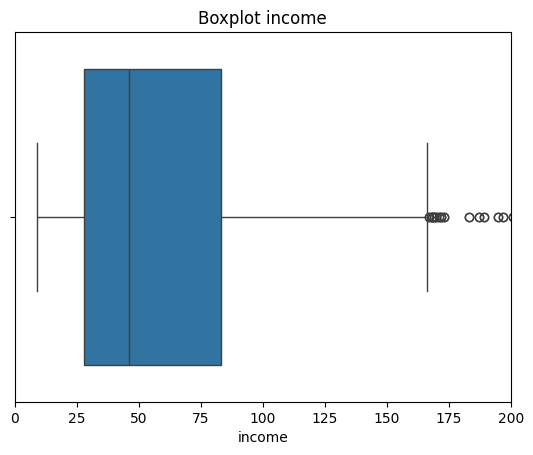

In [86]:
# Boxplot of income
snsplot = sns.boxplot(x='income', data = customer_churn)
snsplot.set_title('Boxplot income')
snsplot.set_xlim(0, 200)

This one is also interesting, basically people who make between 26k and 81k are the most likely to churn (probably those who make more are not so concerned about their phone bill)

Text(0.5, 1.0, 'Histogram age')

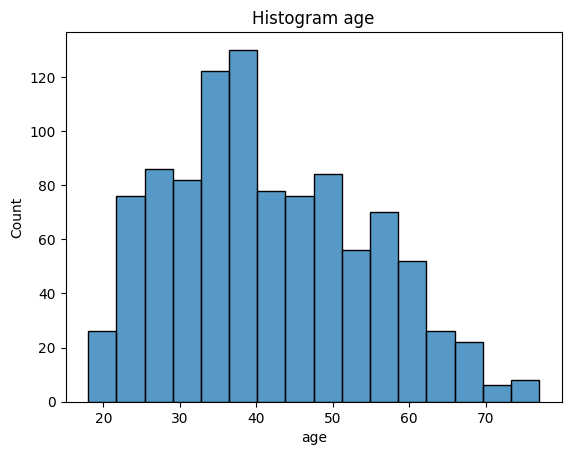

In [87]:
snsplot = sns.histplot(x='age', data = customer_churn)
snsplot.set_title('Histogram age')

Nothing odd here really (what would be odd is having multiple peaks)

Text(0.5, 1.0, 'Scatterplot tenure vs years at current address')

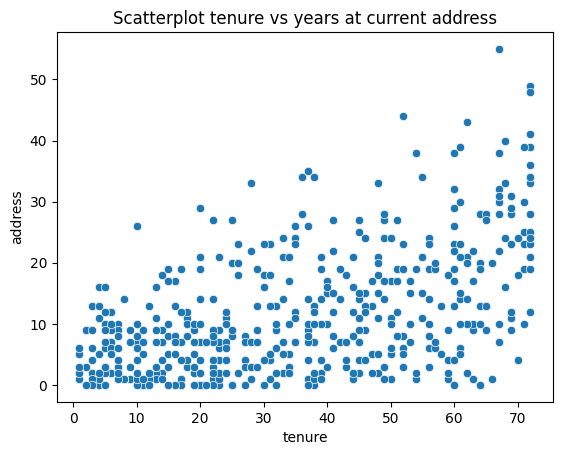

In [88]:
snsplot = sns.scatterplot(x='tenure', y='address', data = customer_churn)
snsplot.set_title('Scatterplot tenure vs years at current address')

ok, it took me several tries to get some numbers that make a graph that actually makes sense.  This particular one seems fairly obvious.  Basically what it is saying is the longer you stay at one address, the longer your tenure is.  While this is true, it also seems to be kind of useless in my opinion.

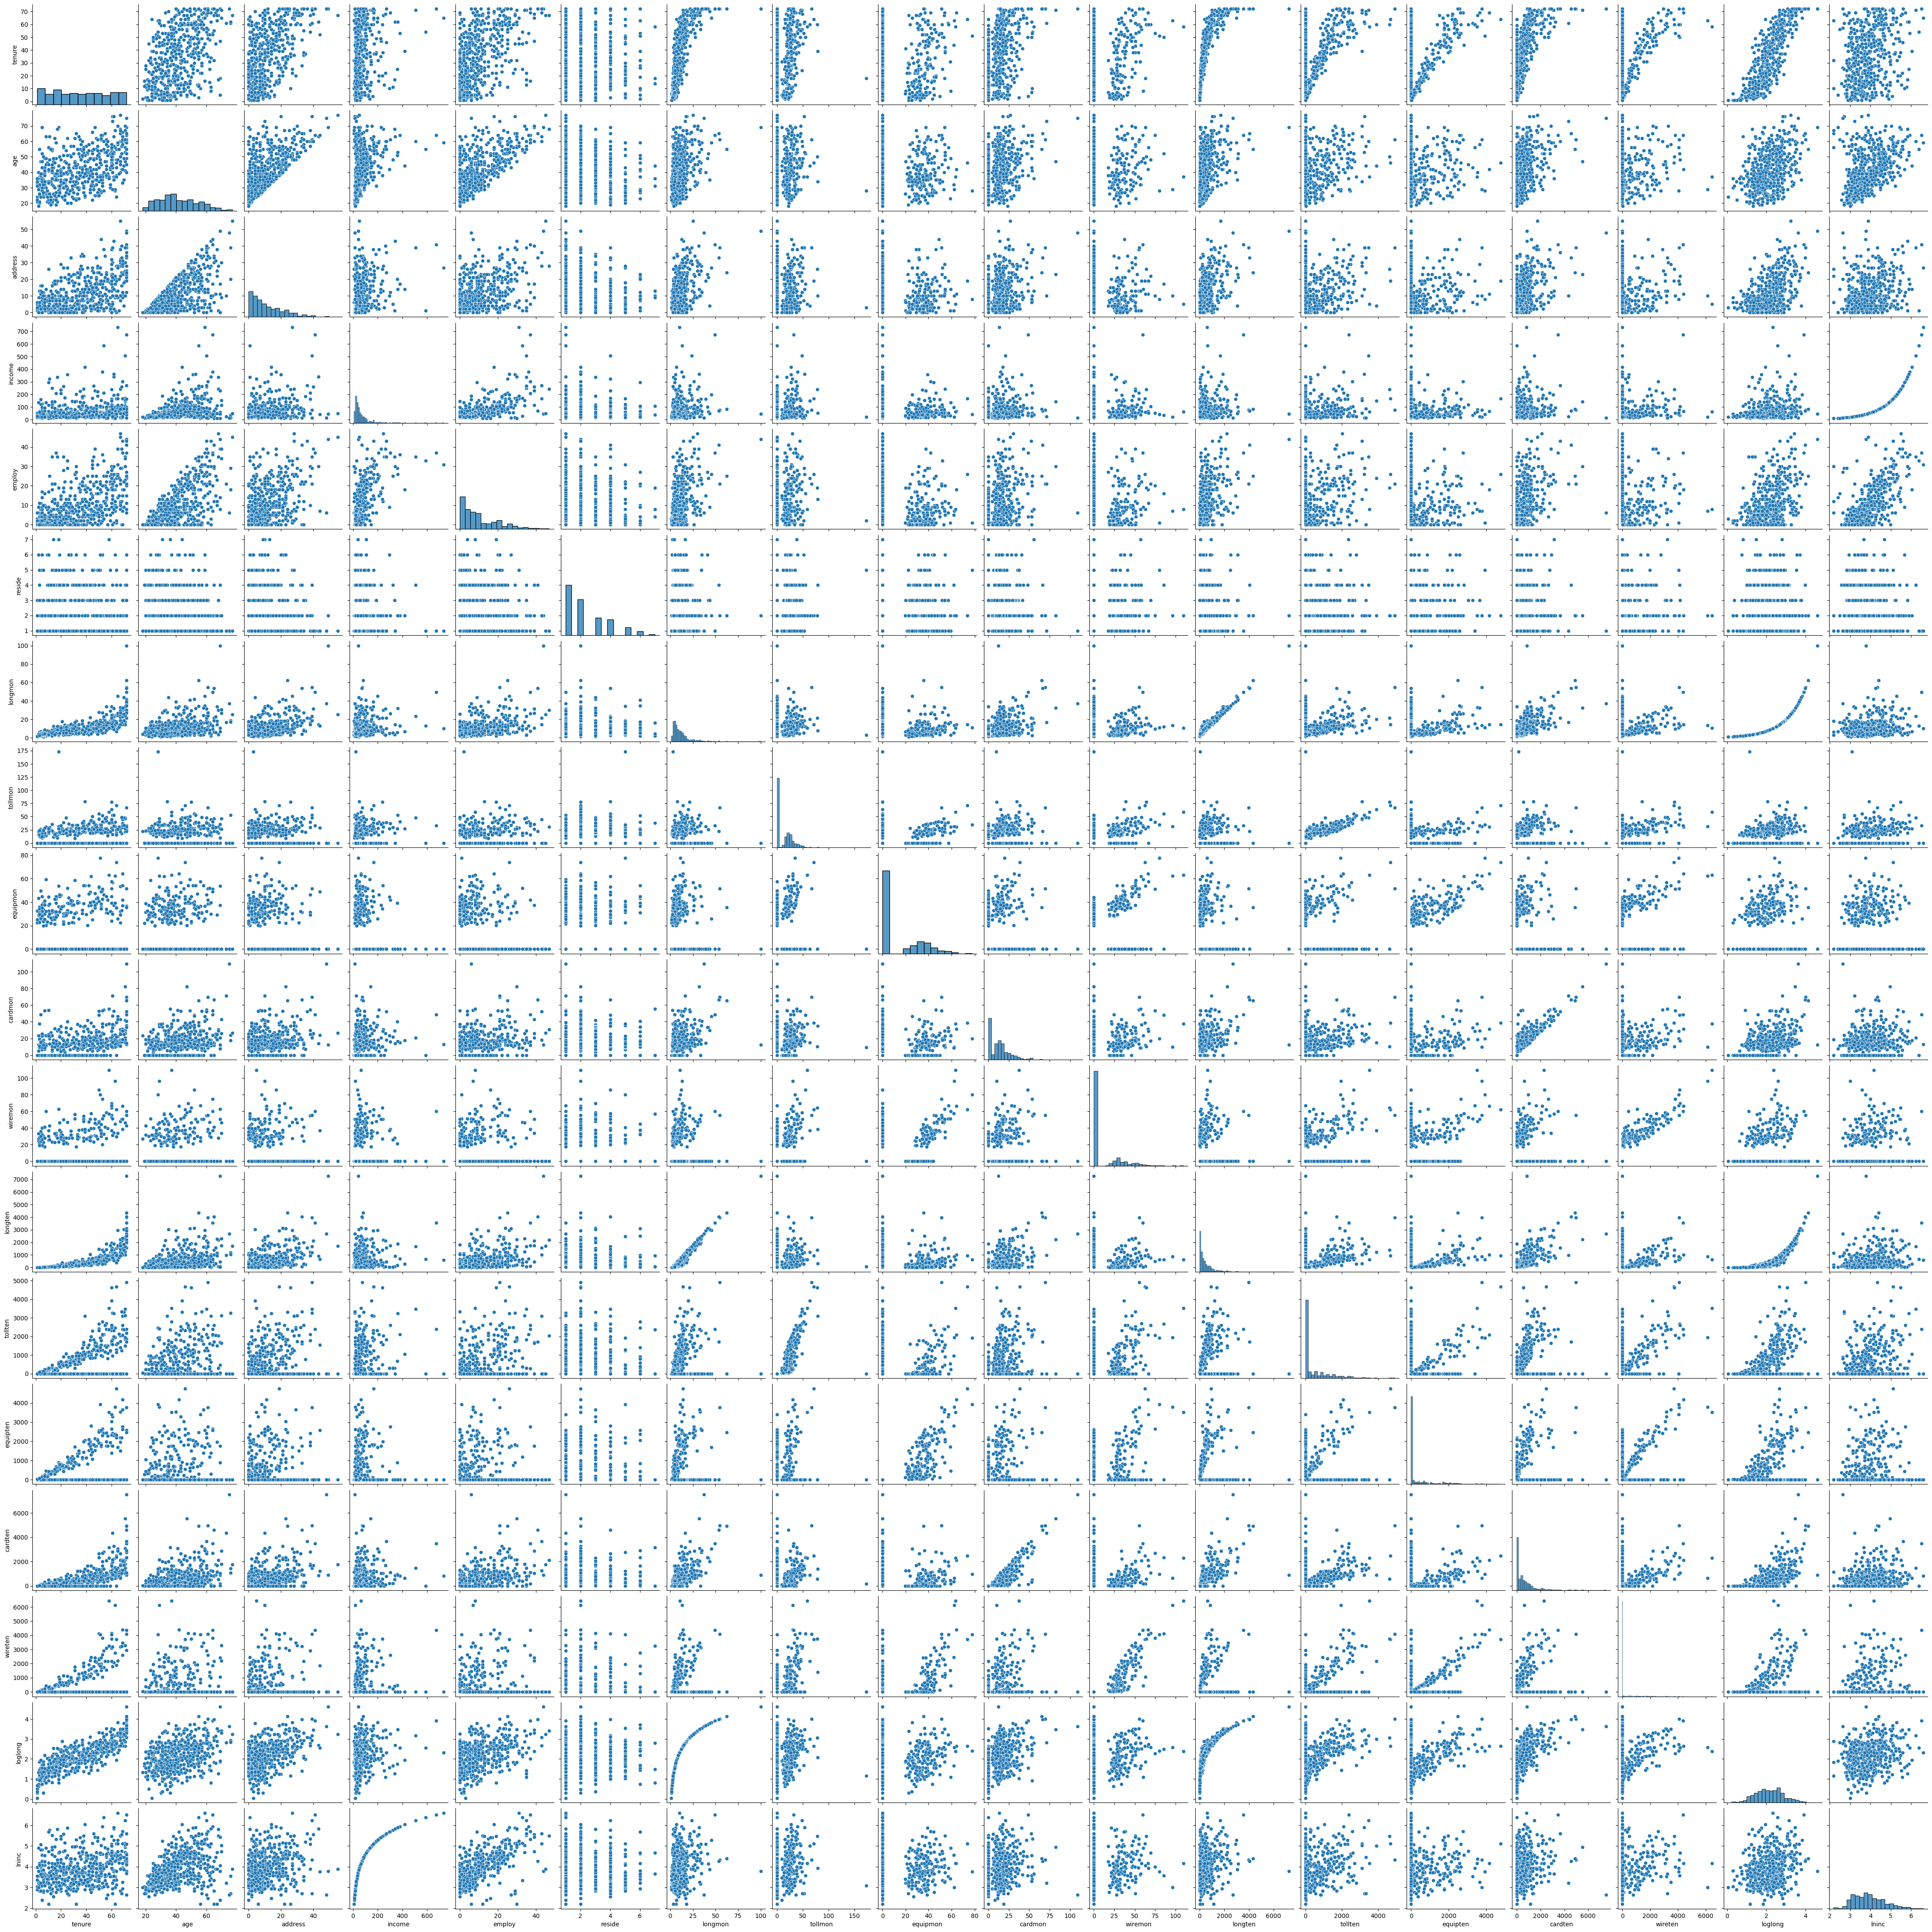

In [89]:
sns.pairplot(data = customer_churn)

Ok, I did this one simply because I wanted to see all the charts.  But after looking at it, I can kinda see why it's done.  By creating this set of charts you can very quickly identify annomolies where you might want to investigate further.

After further investigation into all the various charts shown above, I was unable to come to any conclusions.  The problem is there's just too much data and it is hard to see what is important.  For example, whever i saw a curve or something that looks formulaic, I would notice that the values were directly tied to each other like wiremon vs wireten.  I don't think this tells me anything other than what we already know.

What is our target variable?  This would be churn:

In [90]:
customer_churn['churn'].value_counts()

churn
N    742
Y    258
Name: count, dtype: int64

Based on this, you could say this variable is binary. and also more likely be N (which means the customer did not churn)

To answer the question "Do I think other existing variables can help build a meaningful and predictive classification model for the target variable"  The answer would be, sure, we can use probably all of the variables, but whether the output is meaningful or not is debatable.  For example. lets say we determine that people who have not had their jobs very long are likely to churn.  So what? what do we do with that information?

## Data Preparation

In [91]:
# Check for null values
customer_churn.isnull().sum()

cust_id     0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
equipten    0
cardten     0
wireten     0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
ebill       0
loglong     0
lninc       0
custcat     0
churn       0
dtype: int64

In [92]:
# Drop the useless cust_id index
customer_churn = customer_churn.drop(columns=['cust_id'])

In [93]:
# Examine variable types
customer_churn.dtypes

region       object
tenure        int64
age           int64
marital      object
address       int64
income        int64
ed           object
employ        int64
retire       object
gender       object
reside        int64
tollfree     object
equip        object
callcard     object
wireless     object
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
equipten    float64
cardten       int64
wireten     float64
multline     object
voice        object
pager        object
internet     object
callid       object
callwait     object
forward      object
confer       object
ebill        object
loglong     float64
lninc       float64
custcat      object
churn        object
dtype: object

In [94]:
# change categorical variables to 'category'
customer_churn['region'] = customer_churn['region'].astype('category')
customer_churn['marital'] = customer_churn['marital'].astype('category')
customer_churn['ed'] = customer_churn['ed'].astype('category')
customer_churn['retire'] = customer_churn['retire'].astype('category')
customer_churn['gender'] = customer_churn['gender'].astype('category')
customer_churn['tollfree'] = customer_churn['tollfree'].astype('category')
customer_churn['equip'] = customer_churn['equip'].astype('category')
customer_churn['callcard'] = customer_churn['callcard'].astype('category')
customer_churn['wireless'] = customer_churn['wireless'].astype('category')
customer_churn['multline'] = customer_churn['multline'].astype('category')
customer_churn['voice'] = customer_churn['voice'].astype('category')
customer_churn['pager'] = customer_churn['pager'].astype('category')
customer_churn['internet'] = customer_churn['internet'].astype('category')
customer_churn['callid'] = customer_churn['callid'].astype('category')
customer_churn['callwait'] = customer_churn['callwait'].astype('category')
customer_churn['forward'] = customer_churn['forward'].astype('category')
customer_churn['confer'] = customer_churn['confer'].astype('category')
customer_churn['ebill'] = customer_churn['ebill'].astype('category')
customer_churn['custcat'] = customer_churn['custcat'].astype('category')
#

In [95]:
# Display all categorical variables
customer_churn.select_dtypes(include=['category'])

region marital  ed retire gender tollfree equip callcard wireless  \
0       R2       Y  E4      N      N        N     N        Y        N   
1       R3       Y  E1      N      Y        Y     N        Y        N   
2       R2       Y  E1      N      N        N     N        N        N   
3       R3       Y  E2      N      Y        N     N        Y        N   
4       R3       Y  E4      N      N        Y     N        Y        N   
..     ...     ...  ..    ...    ...      ...   ...      ...      ...   
995     R1       N  E3      N      N        Y     N        Y        N   
996     R1       Y  E2      N      N        Y     N        Y        N   
997     R1       Y  E5      N      N        Y     Y        N        Y   
998     R1       N  E5      N      Y        N     Y        N        N   
999     R3       N  E2      N      Y        Y     N        Y        N   

    multline voice pager internet callid callwait forward confer ebill custcat  
0          N     N     N        N      N        N       Y      N     N      C1  
1          N     N     N        N      Y        Y       N      Y     N      C3  
2          N     N     N        N      Y        N       Y      Y     N      C3  
3          Y     N     N        Y      N        Y       N      N     Y      C2  
4          Y     N     N        N      Y        Y       Y      Y     N      C3  
..       ...   ...   ...      ...    ...      ...     ...    ...   ...     ...  
995        N     N     N        N      Y        Y       Y      Y     N      C3  
996        N     N     N        Y      Y        N       Y      Y     N      C3  
997        Y     Y     Y        Y      Y        N       Y      Y     Y      C4  
998        N     N     N        N      N        N       N      N     N      C1  
999        N     Y     N        N      Y        Y       Y      Y     N      C3  

[1000 rows x 19 columns]

In [96]:
# Display all numeric variables
customer_churn.select_dtypes(include=['int64', 'float64'])

tenure  age  address  income  employ  reside  longmon  tollmon  equipmon  \
0        13   44        9      64       5       2     3.70     0.00       0.0   
1        68   52       24     116      29       2    18.15    18.00       0.0   
2        23   30        9      30       2       4     6.30     0.00       0.0   
3        45   22        2      19       4       5    10.90     0.00       0.0   
4        45   59        7     166      31       5     9.75    28.50       0.0   
..      ...  ...      ...     ...     ...     ...      ...      ...       ...   
995      50   43        6      27       4       1    15.00    45.25       0.0   
996      34   52        2     106      19       2     4.95    19.00       0.0   
997      15   46       17      63       1       2     3.70    16.50      42.5   
998       7   34        2      22       5       1     4.65     0.00      25.6   
999      70   49       18      87      22       1    25.60    33.50       0.0   

     cardmon  wiremon  longten  tollten  equipten  cardten  wireten  loglong  \
0       7.50      0.0    37.45     0.00      0.00      110      0.0    1.308   
1      30.25      0.0  1300.60  1247.20      0.00     2150      0.0    2.899   
2       0.00      0.0   157.05     0.00      0.00        0      0.0    1.841   
3       8.75      0.0   504.50     0.00      0.00      415      0.0    2.389   
4      12.00      0.0   449.05  1240.15      0.00      505      0.0    2.277   
..       ...      ...      ...      ...       ...      ...      ...      ...   
995    52.75      0.0   817.85  2320.25      0.00     2645      0.0    2.708   
996    13.50      0.0   153.50   649.35      0.00      430      0.0    1.599   
997     0.00     33.1    40.55   207.35    547.95        0    475.3    1.308   
998     0.00      0.0    29.35     0.00    179.10        0      0.0    1.537   
999    25.25      0.0  1841.85  2368.20      0.00     1705      0.0    3.243   

     lninc  
0    4.159  
1    4.754  
2    3.401  
3    2.944  
4    5.112  
..     ...  
995  3.296  
996  4.663  
997  4.143  
998  3.091  
999  4.466  

[1000 rows x 18 columns]

In [97]:
# Create dummy variables
customer_churn = pd.get_dummies(customer_churn, columns=['region','marital','ed','retire','gender','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill','custcat'])
customer_churn

tenure  age  address  income  employ  reside  longmon  tollmon  equipmon  \
0        13   44        9      64       5       2     3.70     0.00       0.0   
1        68   52       24     116      29       2    18.15    18.00       0.0   
2        23   30        9      30       2       4     6.30     0.00       0.0   
3        45   22        2      19       4       5    10.90     0.00       0.0   
4        45   59        7     166      31       5     9.75    28.50       0.0   
..      ...  ...      ...     ...     ...     ...      ...      ...       ...   
995      50   43        6      27       4       1    15.00    45.25       0.0   
996      34   52        2     106      19       2     4.95    19.00       0.0   
997      15   46       17      63       1       2     3.70    16.50      42.5   
998       7   34        2      22       5       1     4.65     0.00      25.6   
999      70   49       18      87      22       1    25.60    33.50       0.0   

     cardmon  ...  forward_N  forward_Y  confer_N  confer_Y  ebill_N  ebill_Y  \
0       7.50  ...      False       True      True     False     True    False   
1      30.25  ...       True      False     False      True     True    False   
2       0.00  ...      False       True     False      True     True    False   
3       8.75  ...       True      False      True     False    False     True   
4      12.00  ...      False       True     False      True     True    False   
..       ...  ...        ...        ...       ...       ...      ...      ...   
995    52.75  ...      False       True     False      True     True    False   
996    13.50  ...      False       True     False      True     True    False   
997     0.00  ...      False       True     False      True    False     True   
998     0.00  ...       True      False      True     False     True    False   
999    25.25  ...      False       True     False      True     True    False   

     custcat_C1  custcat_C2 custcat_C3  custcat_C4  
0          True       False      False       False  
1         False       False       True       False  
2         False       False       True       False  
3         False        True      False       False  
4         False       False       True       False  
..          ...         ...        ...         ...  
995       False       False       True       False  
996       False       False       True       False  
997       False       False      False        True  
998        True       False      False       False  
999       False       False       True       False  

[1000 rows x 63 columns]

Now we need to look at correlated variables.  in my opinion the various 'mon' vs 'ten' variables (such as tollmon vs tollten) are correlated so we should drop one or the other.  For this test we will trop the 'ten' versions

In [98]:
customer_churn = customer_churn.drop(columns=['longten','tollten','equipten','cardten','wireten'])

As far as i can tell the data is balanced, we have dropped one of each cateogorical dummy var and we have dropped the correlated values

# Modeling

In [99]:
# Partition the data
predictors = customer_churn.drop(columns=['churn'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, customer_churn['churn'], test_size=0.2, random_state=42)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(800, 57) (200, 57) (800,) (200,)


In [100]:
# lets do a bunch of stuff that was done in the previous example i guess?
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['churn'] == 'N']
minority_df = combined_train_df[combined_train_df['churn'] == 'Y']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=42)

# Split the balanced data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['churn'])
target_train = balanced_data['churn']

In [101]:
# Examine the proportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

churn
Y    0.5
N    0.5
Name: proportion, dtype: float64 (438,)


In [102]:
# Examine the proportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

churn
N    0.805
Y    0.195
Name: proportion, dtype: float64


In [103]:
# Build a decision tree model on training data with max depth = 2
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

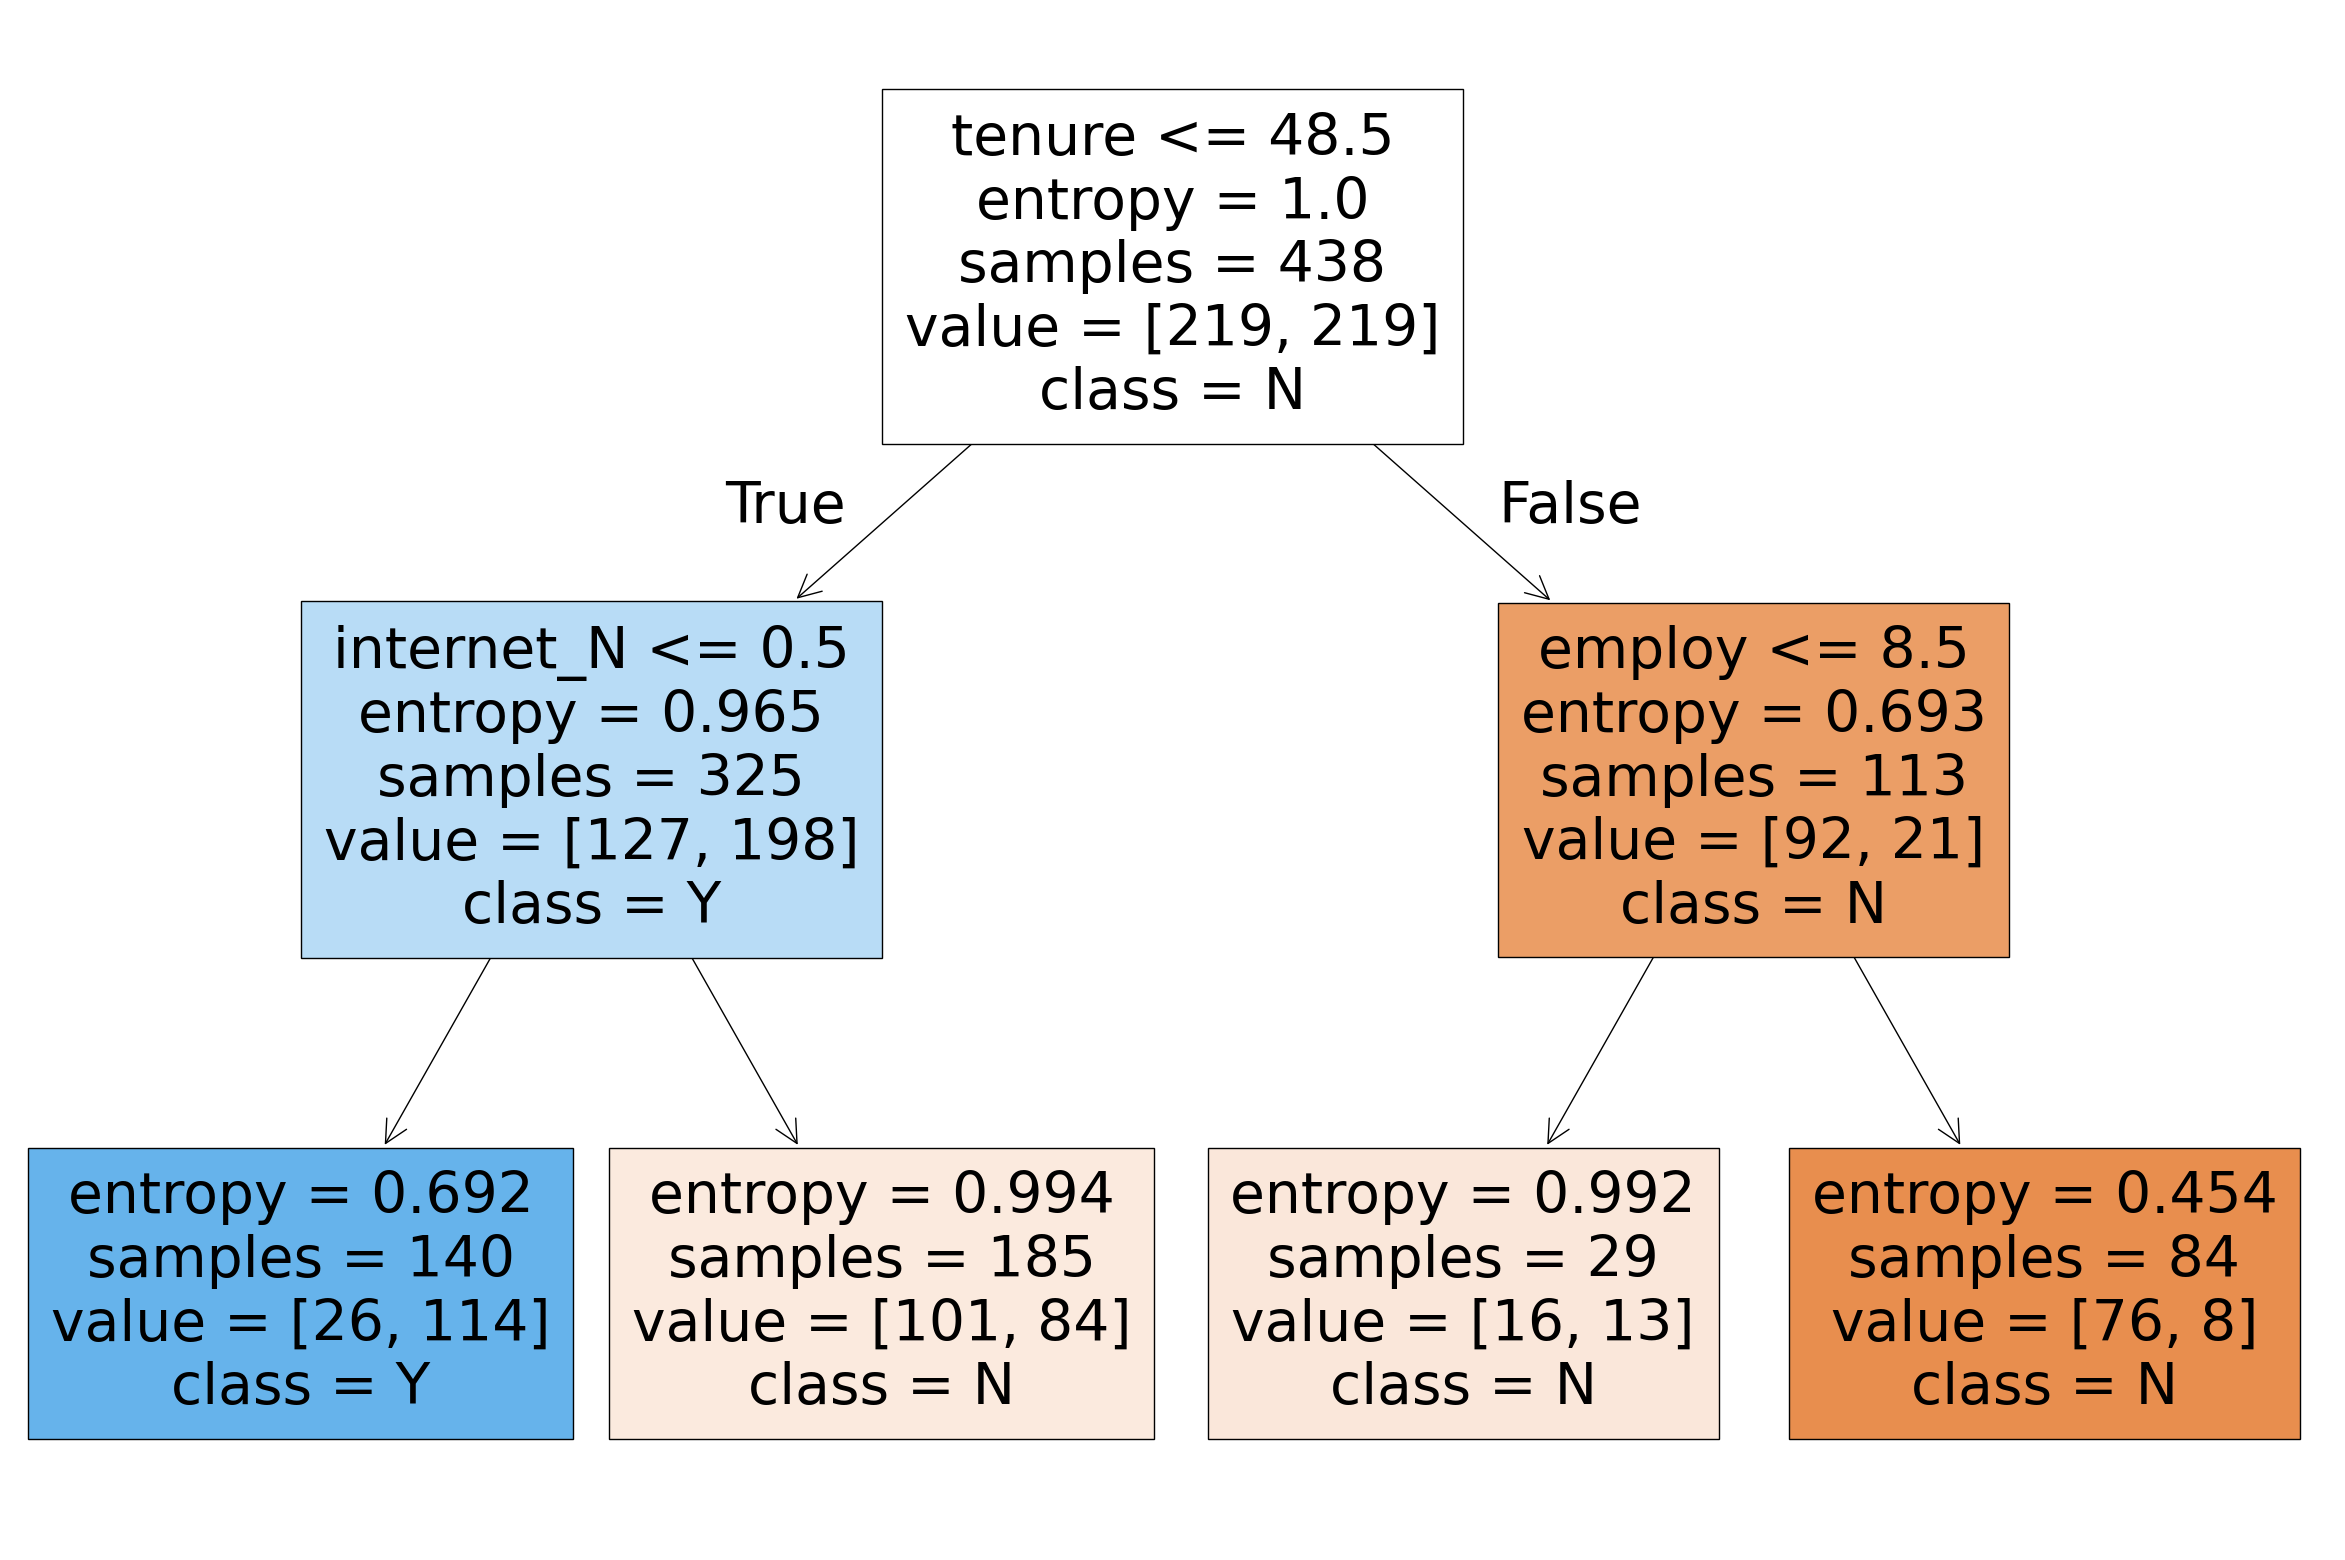

In [105]:
import matplotlib.pyplot as plt
from sklearn import tree  # Also needed for tree.plot_tree

# Plot the tree
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model,
                   feature_names=list(predictors_train.columns),
                   class_names=['N','Y'],
                   filled=True)